### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Preprocess Data

In [2]:
dtype_dict = {
    'Notes': 'str',
    'ISO3_code': 'str',
    'ISO2_code': 'str'
}

# Đọc file CSV với dtype được chỉ định
df = pd.read_csv("data/WPP2022_PopulationBySingleAgeSex_Medium_1950-2021.csv", dtype=dtype_dict)
print(df.info())
print(df.head())
print(df.isnull().sum() )

df['SDMX_code'].fillna(df['SDMX_code'].mean(), inplace=True)
df['Notes'].fillna(df['Notes'].mode()[0], inplace=True)
df['ISO3_code'].fillna(df['ISO3_code'].mode()[0], inplace=True)
df['ISO2_code'].fillna(df['ISO2_code'].mode()[0], inplace=True)
numeric_df = df.select_dtypes(include=['number'])  # Chọn các cột có kiểu số
numeric_summary = numeric_df.describe()  # Tạo bảng tóm tắt cho các cột số

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072520 entries, 0 to 2072519
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SortOrder    int64  
 1   LocID        int64  
 2   Notes        object 
 3   ISO3_code    object 
 4   ISO2_code    object 
 5   SDMX_code    float64
 6   LocTypeID    int64  
 7   LocTypeName  object 
 8   ParentID     int64  
 9   Location     object 
 10  VarID        int64  
 11  Variant      object 
 12  Time         int64  
 13  MidPeriod    int64  
 14  AgeGrp       object 
 15  AgeGrpStart  int64  
 16  AgeGrpSpan   int64  
 17  PopMale      float64
 18  PopFemale    float64
 19  PopTotal     float64
dtypes: float64(4), int64(9), object(7)
memory usage: 316.2+ MB
None
   SortOrder  LocID Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0          1    900   NaN       NaN       NaN        1.0          1   
1          1    900   NaN       NaN       NaN        1.0          1   
2          1    900   NaN       N

/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_20465/3671568801.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SDMX_code'].fillna(df['SDMX_code'].mean(), inplace=True)
/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_20465/3671568801.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

### Distribution of Population Male (World)

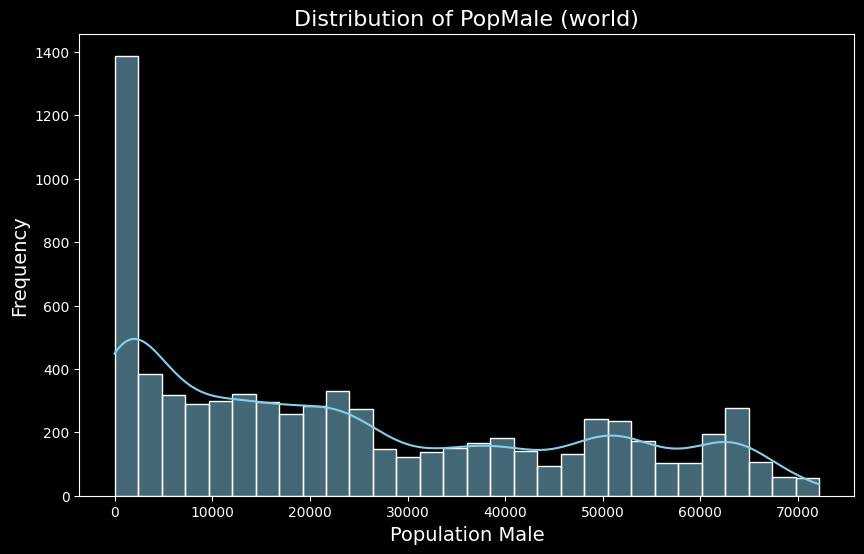

In [3]:
df_world = df[df['Location'] == 'World']

plt.figure(figsize=(10, 6))
sns.histplot(df_world['PopMale'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of PopMale (world)', fontsize=16)
plt.xlabel('Population Male', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Population Pyramid (2021)

/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_20465/1042036758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['AgeGrp'] = pd.to_numeric(df_2021['AgeGrp'], errors='coerce')


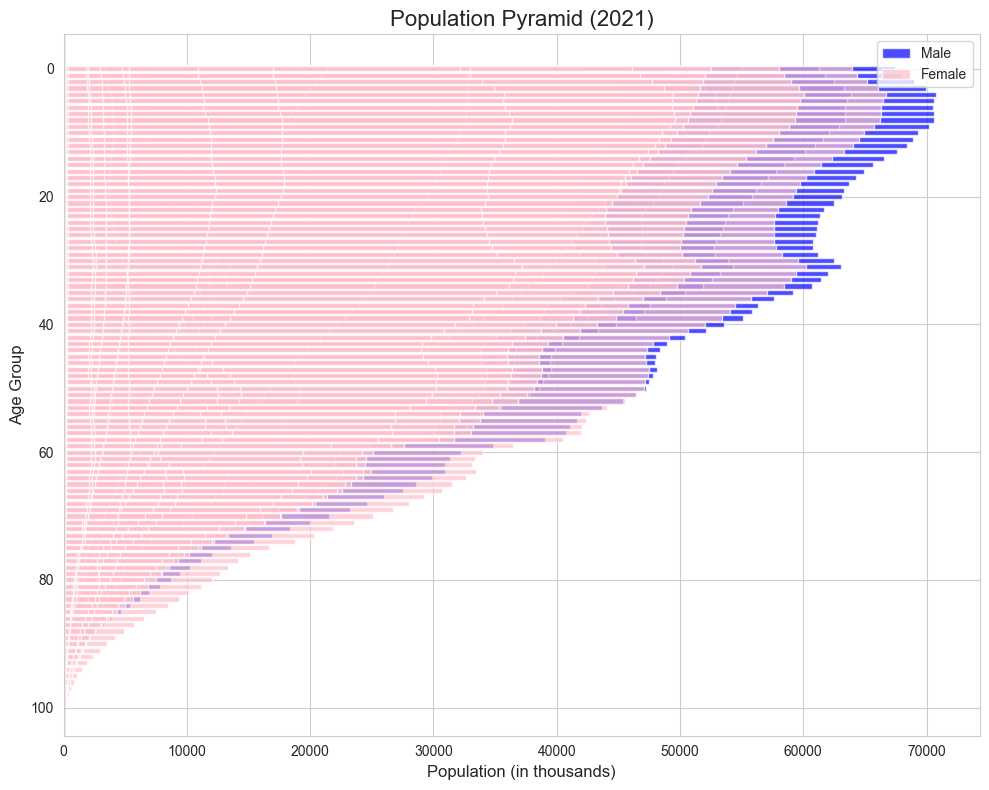

In [4]:
# Filter the dataset for the year 2021
df_2021 = df[df['Time'] == 2021]

# Ensure AgeGrp is numeric
df_2021['AgeGrp'] = pd.to_numeric(df_2021['AgeGrp'], errors='coerce')

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Plot male and female population
plt.barh(df_2021['AgeGrp'], df_2021['PopMale'], color='blue', label='Male', alpha=0.7)
plt.barh(df_2021['AgeGrp'], df_2021['PopFemale'], color='pink', label='Female', alpha=0.7)

# Add title and labels
plt.title("Population Pyramid (2021)", fontsize=16)
plt.xlabel("Population (in thousands)", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.axvline(0, color='black', linewidth=0.8)  # Y-axis line
plt.legend(loc='upper right', fontsize=10)

# Customize x and y axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis to have younger age groups at the top

# Show plot
plt.tight_layout()
plt.show()

### Total Population by Decade (World)

/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_20465/787437727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world['Decade'] = (df_world['Time'] // 10) * 10
/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_20465/787437727.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decade', y='PopTotal', data=decade_summary, palette='Blues_d')


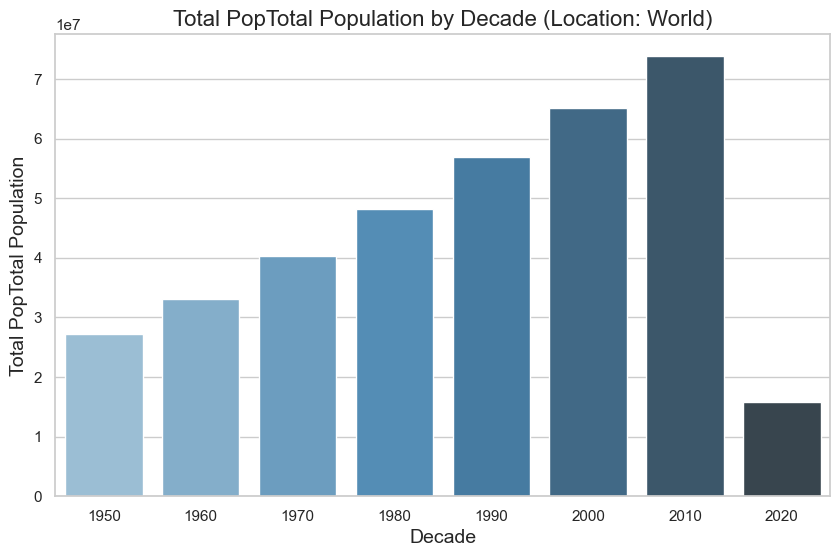

In [5]:
df_world = df[df['Location'] == 'World']

# Tạo cột 'Decade' để nhóm dữ liệu theo thập kỷ
df_world['Decade'] = (df_world['Time'] // 10) * 10

# Nhóm theo thập kỷ và tính tổng số lượng nữ giới
decade_summary = df_world.groupby('Decade')['PopTotal'].sum().reset_index()

# Vẽ biểu đồ thể hiện số lượng nữ giới trong từng thập kỷ
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='PopTotal', data=decade_summary, palette='Blues_d')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Total PopTotal Population by Decade (Location: World)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total PopTotal Population', fontsize=14)

# Hiển thị biểu đồ
plt.show()

### Age Distribution for the Years 1950, 1980, and 2021

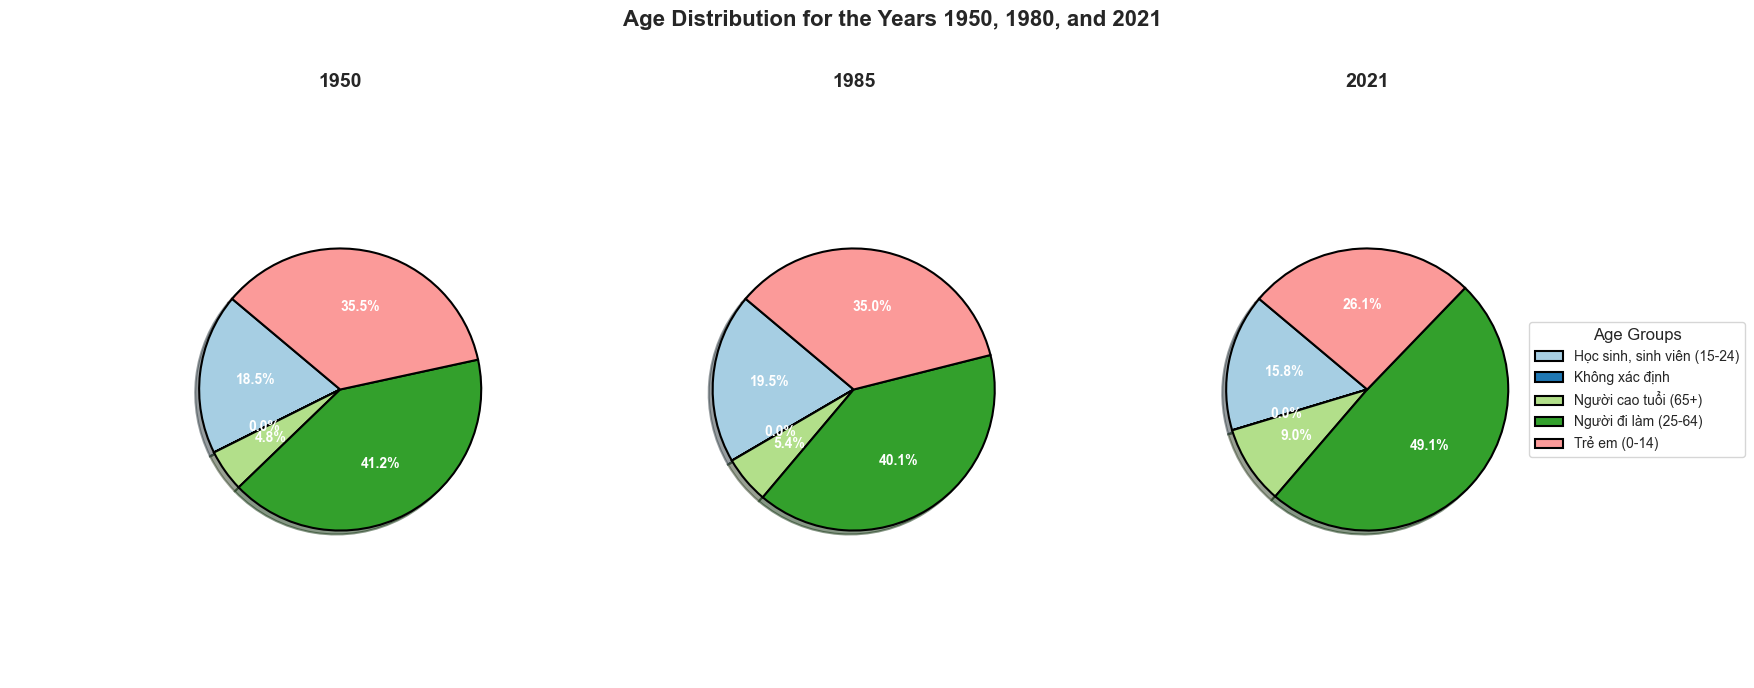

In [6]:
df['AgeGrp'] = pd.to_numeric(df['AgeGrp'], errors='coerce')

# Định nghĩa các nhóm độ tuổi
def categorize_age(age):
    if pd.isna(age):  # Kiểm tra giá trị bị thiếu (NaN)
        return 'Không xác định'
    elif age <= 14:
        return 'Trẻ em (0-14)'
    elif age <= 24:
        return 'Học sinh, sinh viên (15-24)'
    elif age <= 64:
        return 'Người đi làm (25-64)'
    else:
        return 'Người cao tuổi (65+)'

# Áp dụng phân loại độ tuổi vào cột mới 'AgeCategory'
df['AgeCategory'] = df['AgeGrp'].apply(categorize_age)

# Tạo subplot với 3 biểu đồ hình tròn
fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Tăng kích thước biểu đồ

# Duyệt qua từng năm và vẽ biểu đồ hình tròn cho từng năm
years = [1950, 1985, 2021]
for i, year in enumerate(years):
    # Lọc dữ liệu cho từng năm
    year_data = df[df['Time'] == year]
    
    # Tính tổng dân số cho từng nhóm độ tuổi
    pop_by_category = year_data.groupby('AgeCategory')['PopTotal'].sum()

    # Tạo biểu đồ hình tròn
    wedges, texts, autotexts = axes[i].pie(pop_by_category, 
                                            labels=pop_by_category.index.tolist(),  # Chuyển index thành danh sách
                                            autopct='%1.1f%%',  # Hiển thị phần trăm
                                            startangle=140,     # Đặt góc bắt đầu cho biểu đồ
                                            colors=plt.cm.Paired.colors,  # Dùng màu sắc Paired
                                            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Thêm viền cho các phần
                                            textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'},  # Chỉnh văn bản
                                            shadow=True)        # Thêm bóng đổ cho biểu đồ

    # Thêm tiêu đề cho từng biểu đồ (giảm khoảng cách với biểu đồ bằng cách sử dụng `pad`)
    axes[i].set_title(f'{year}', fontsize=14, fontweight='bold', pad=10)  # Chỉnh sửa `pad` ở đây

    # Đảm bảo biểu đồ có tỷ lệ bằng nhau (hình tròn)
    axes[i].axis('equal')

# Thêm tiêu đề tổng thể cho toàn bộ biểu đồ (cỡ chữ nhỏ lại)
plt.suptitle('Age Distribution for the Years 1950, 1980, and 2021', fontsize=16, fontweight='bold')

# Điều chỉnh bố cục để thêm bảng chú thích chung
plt.tight_layout()

# Thêm bảng chú thích chung ở ngoài biểu đồ
plt.legend(handles=wedges, labels=pop_by_category.index.tolist(), title="Age Groups", loc='center left', fontsize=10, bbox_to_anchor=(1, 0.5))

# Hiển thị biểu đồ
plt.subplots_adjust(top=0.85, right=0.85)  # Điều chỉnh khoảng cách để bảng chú thích không bị che khuất
plt.show()

### Population Distribution by Location for the Year 1950

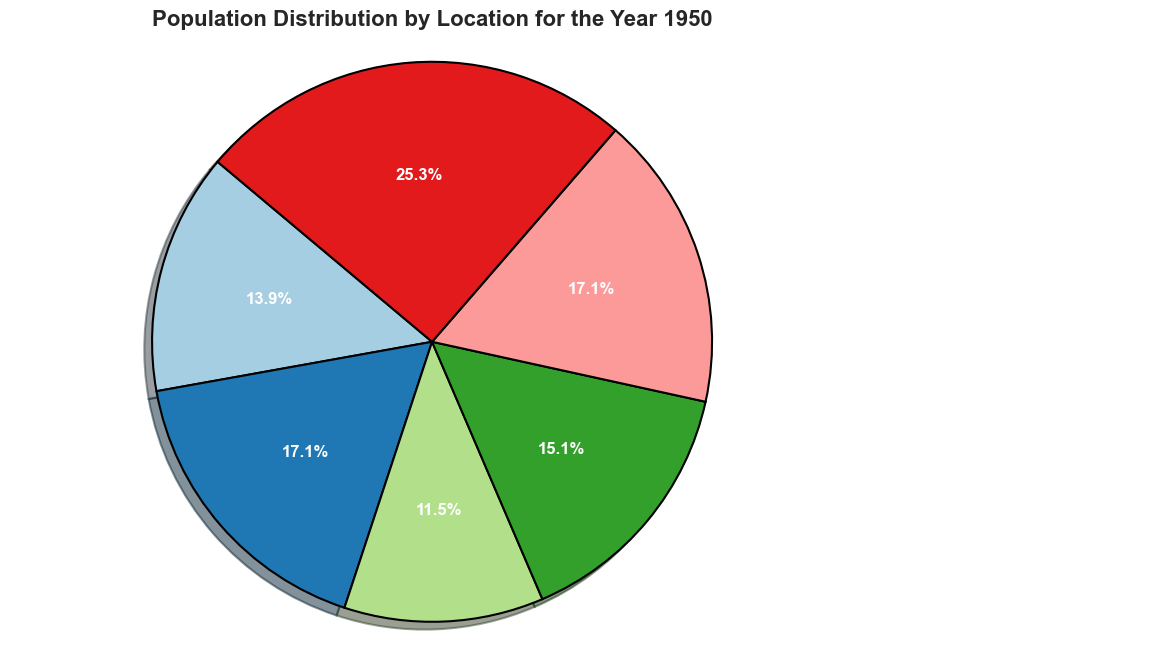

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã tải bộ dữ liệu vào dataframe 'df'
# Lọc dữ liệu cho năm 1950
data_1950 = df[df['Time'] == 1950]

# Tính tổng dân số theo khu vực (Location)
pop_by_location_1950 = data_1950.groupby('Location')['PopTotal'].sum()

# Lọc ra một số khu vực lớn hoặc các quốc gia chính nếu số lượng khu vực quá nhiều
# Ví dụ chỉ lấy một số khu vực lớn hoặc quốc gia phổ biến
pop_by_location_1950 = pop_by_location_1950[pop_by_location_1950 > 1000000]  # Lọc các khu vực có dân số > 10 triệu

# Vẽ biểu đồ tròn cho phân bổ dân số theo khu vực năm 1950
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ tròn
wedges, texts, autotexts = plt.pie(pop_by_location_1950, 
                                    labels=pop_by_location_1950.index.tolist(),
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=plt.cm.Paired.colors,
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
                                    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'},
                                    shadow=True)

# Thêm tiêu đề
plt.title('Population Distribution by Location for the Year 1950', fontsize=16, fontweight='bold')

# Đảm bảo biểu đồ có tỷ lệ bằng nhau (hình tròn)
plt.axis('equal')  

# Hiển thị biểu đồ
plt.show()

### List of Countries

In [8]:
countries = df['Location'].unique()

# In ra danh sách quốc gia
print(countries)

['World' 'Sub-Saharan Africa' 'Northern Africa and Western Asia'
 'Central and Southern Asia' 'Eastern and South-Eastern Asia'
 'Latin America and the Caribbean'
 'Oceania (excluding Australia and New Zealand)' 'Australia/New Zealand'
 'Europe and Northern America' 'More developed regions'
 'Less developed regions' 'Least developed countries'
 'Less developed regions, excluding least developed countries'
 'Less developed regions, excluding China'
 'Land-locked Developing Countries (LLDC)'
 'Small Island Developing States (SIDS)' 'High-income countries'
 'Middle-income countries' 'Upper-middle-income countries'
 'Lower-middle-income countries' 'Low-income countries'
 'No income group available' 'Africa' 'Eastern Africa' 'Burundi' 'Comoros'
 'Djibouti' 'Eritrea' 'Ethiopia' 'Kenya' 'Madagascar' 'Malawi' 'Mauritius'
 'Mayotte' 'Mozambique' 'Réunion' 'Rwanda' 'Seychelles' 'Somalia'
 'South Sudan' 'Uganda' 'United Republic of Tanzania' 'Zambia' 'Zimbabwe'
 'Middle Africa' 'Angola' 'Cameroon'

### Comparison of Male and Female Population by Decade

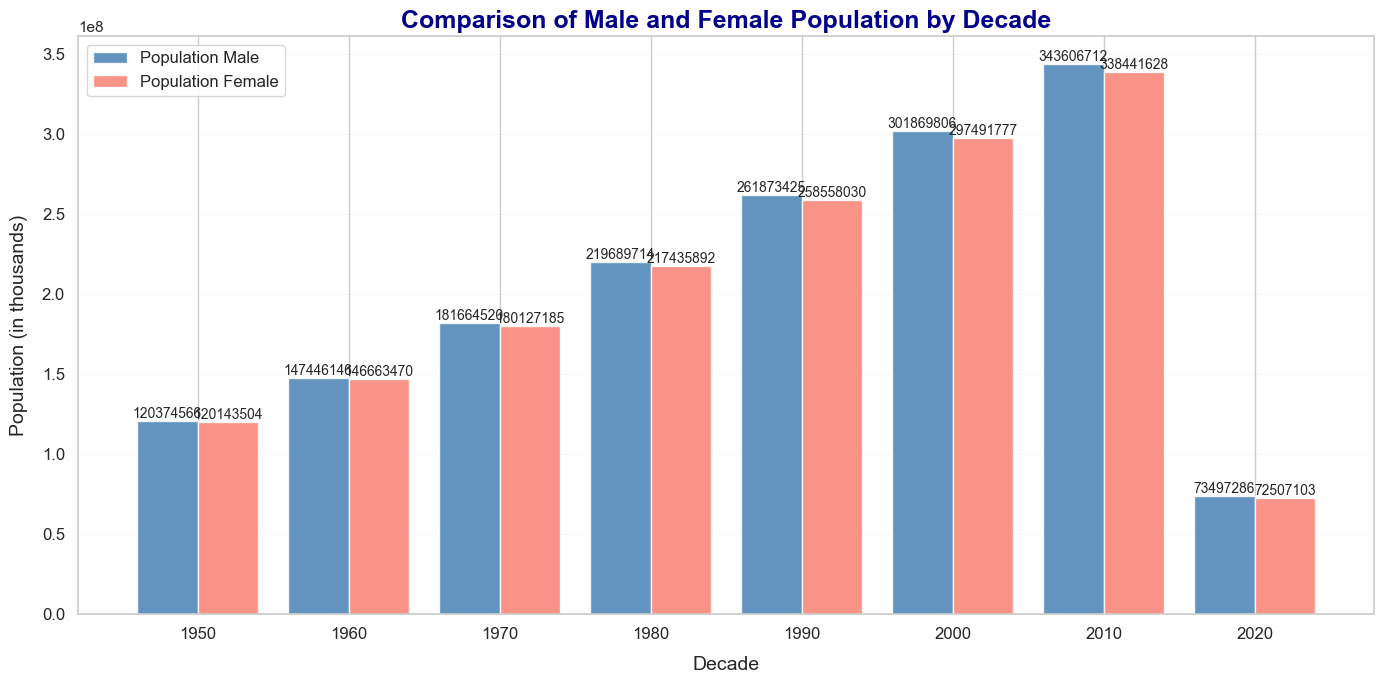

In [9]:
df["Decade"] = (df["Time"] // 10) * 10
aggregated_data = df.groupby("Decade")[["PopMale", "PopFemale"]].sum().reset_index()

# Create a bar chart to compare male and female population by decade
plt.figure(figsize=(14, 7))
bar_width = 0.4  # Width of each bar
indices = range(len(aggregated_data))

# Plot male and female bars side-by-side
male_bars = plt.bar(
    [i - bar_width / 2 for i in indices], 
    aggregated_data["PopMale"], 
    width=bar_width, 
    label="Population Male", 
    color='steelblue', 
    alpha=0.85
)
female_bars = plt.bar(
    [i + bar_width / 2 for i in indices], 
    aggregated_data["PopFemale"], 
    width=bar_width, 
    label="Population Female", 
    color='salmon', 
    alpha=0.85
)

# Add title and labels
plt.title("Comparison of Male and Female Population by Decade", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Decade", fontsize=14, labelpad=10)
plt.ylabel("Population (in thousands)", fontsize=14, labelpad=10)
plt.xticks(indices, aggregated_data["Decade"], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5, axis='y')

# Add legend
plt.legend(fontsize=12, loc="upper left")

# Add values on top of bars
for bar in male_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10)

for bar in female_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()